In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

!pip install -U scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
#setting the figure display for the Visualization
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [7]:


file_path = r"C:\Users\KAVYA .M\Downloads\Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv"

    

df = pd.read_csv(file_path)

df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
1      Sangat_kurang  Jakarta Utara            Website  ...  +6281270745xxx   
2              Bagus  Jakarta Timur             Indeed  ...  +6281346215xxx   
3              Bagus  Jakarta Pusat           LinkedIn  ...  +6283233846xxx   
4              Bagus  Jakarta Timur           LinkedIn  ...  +6287883263xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com           Magister              1   
1     jealousGelding2239@yahoo.com            Sarjana              1   
2      pluckyMuesli3961@icloud.com           Magister              1   
3  stressedTruffle1406@hotmail.com            Sarjana              1   
4         shyTermite7149@gmail.com            Sarjana              1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan  TanggalResign  
0                2016-2-15              -  
1                2020-1-17      2018-6-16  
2               2016-01-10      2014-9-24  
3               2020-02-04              -  
4                2020-1-22     2018-09-06  

[5 rows x 25 columns]

In [9]:
df.shape

(287, 25)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [13]:
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}':\n == {unique_values_str} == \n")

Unique values in 'Username':
 == spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7, emptyMacaw4, madZebra1, cynicalMandrill7, lyingMussel8, enviousMoth4, puzzledCake4, grizzledSnipe7, yearningBagels0, sheepishSheep9, madWildfowl7, enviousSalami4, pacifiedRaisins7, wrathfulMagpie6, hushedSeahorse7, guiltyMoth4, peacefulCoati5, dejectedPolenta7, needfulLeopard2, offendedIguana0, pluckyHoopoe3, needySyrup4, forsakenOwl1, pluckyApples4, guiltySnail8, grizzledFlamingo9, worriedSyrup7, somberBoars0, giddyMallard9, madFerret4, mereCaribou1, decimalAbalone6, blissfulMussel3, ardentLapwing0, peskyTeal7, blissfulHyena1, solidMacaw1, cautiousPolenta9, excludedPorpoise4, shamefulIguana0, shySyrup7, forsakenCow7, grumpyFish4, wingedPorpoise5, soreCaribou0, needfulCardinal0, giddyCheetah9, hushedOil9, crummyPudding5, selfishBasmati2, adoringCardinal9, importedApricots7, grizzledCod7, insecureShads2, wornoutChamois3, lazyToucan3, cockyTeal5, puzzledBagels7, debonairPlov

In [15]:
missing_values_count = df.isnull().sum()

missing_values_count

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

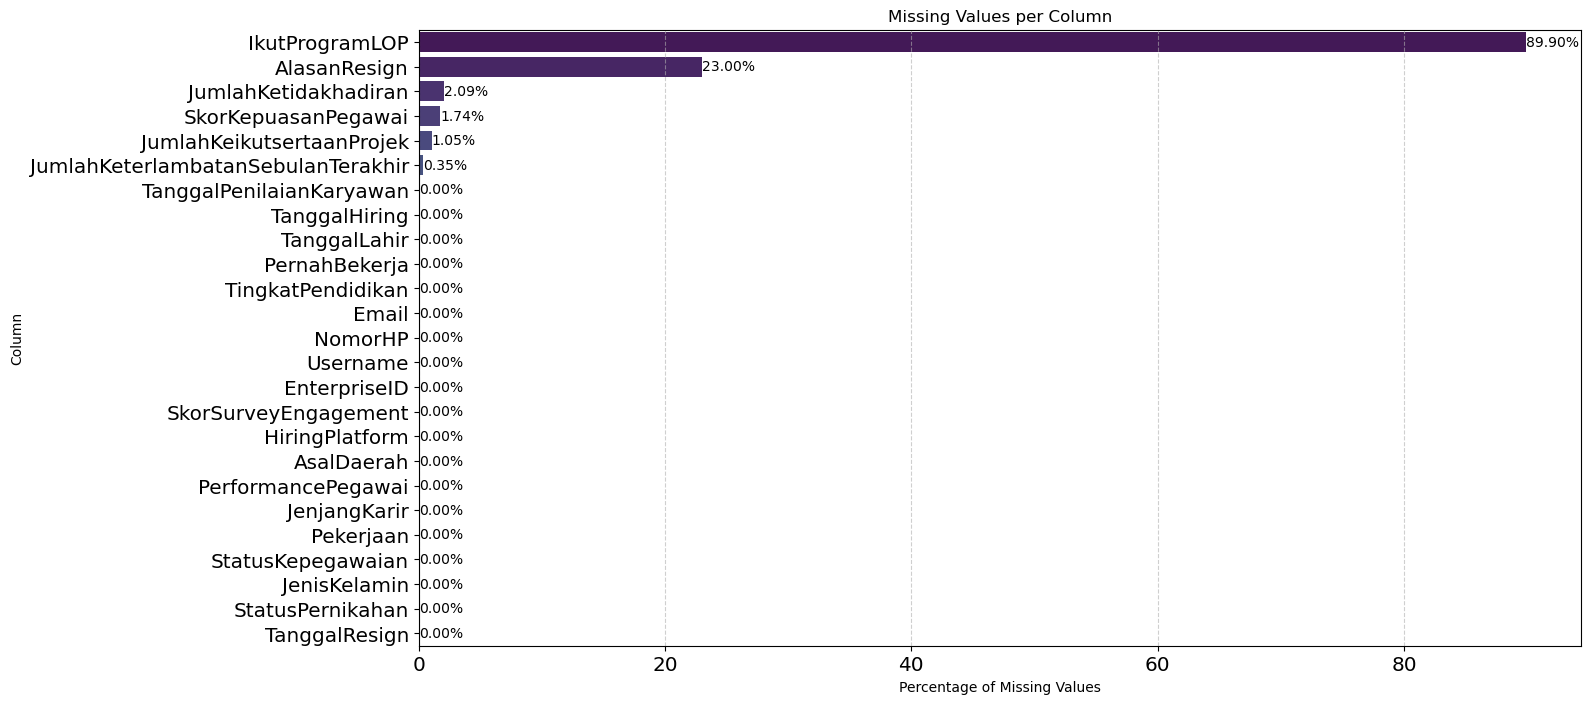

In [17]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Missing Values per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
     

In [19]:

#set the categorical columns
categorical_columns = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
#set the numerical columns
numeric_columns = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
     

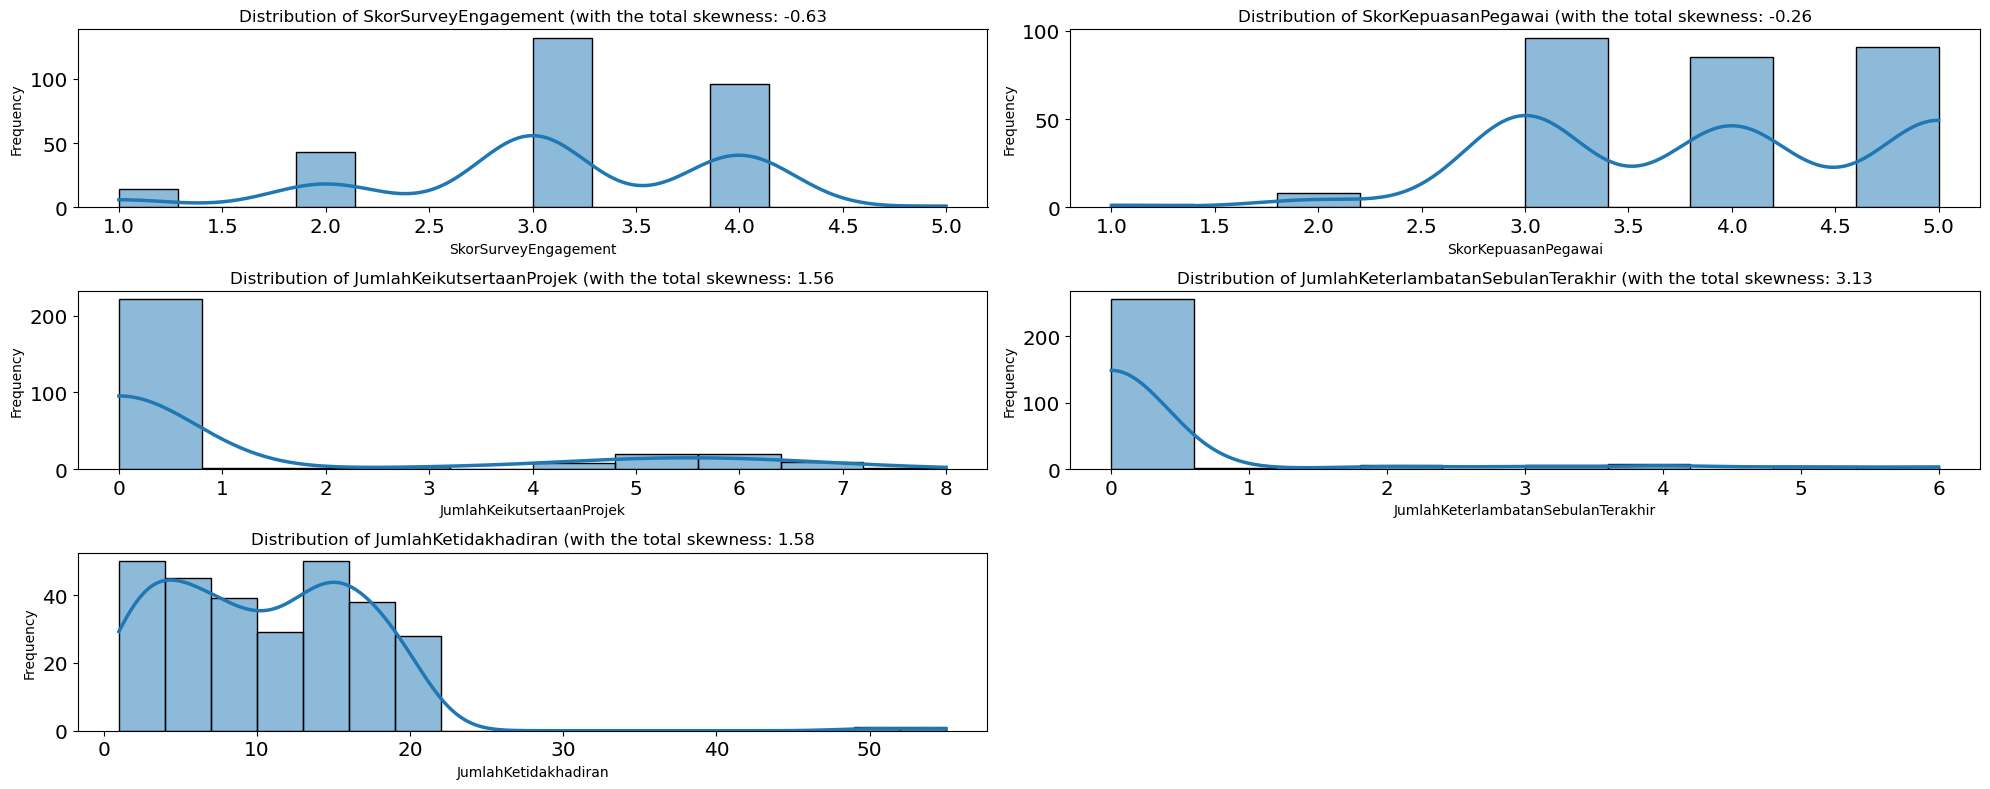

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(20, 8))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(numeric_columns):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name} (with the total skewness: {skewness:.2f}')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(numeric_columns), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

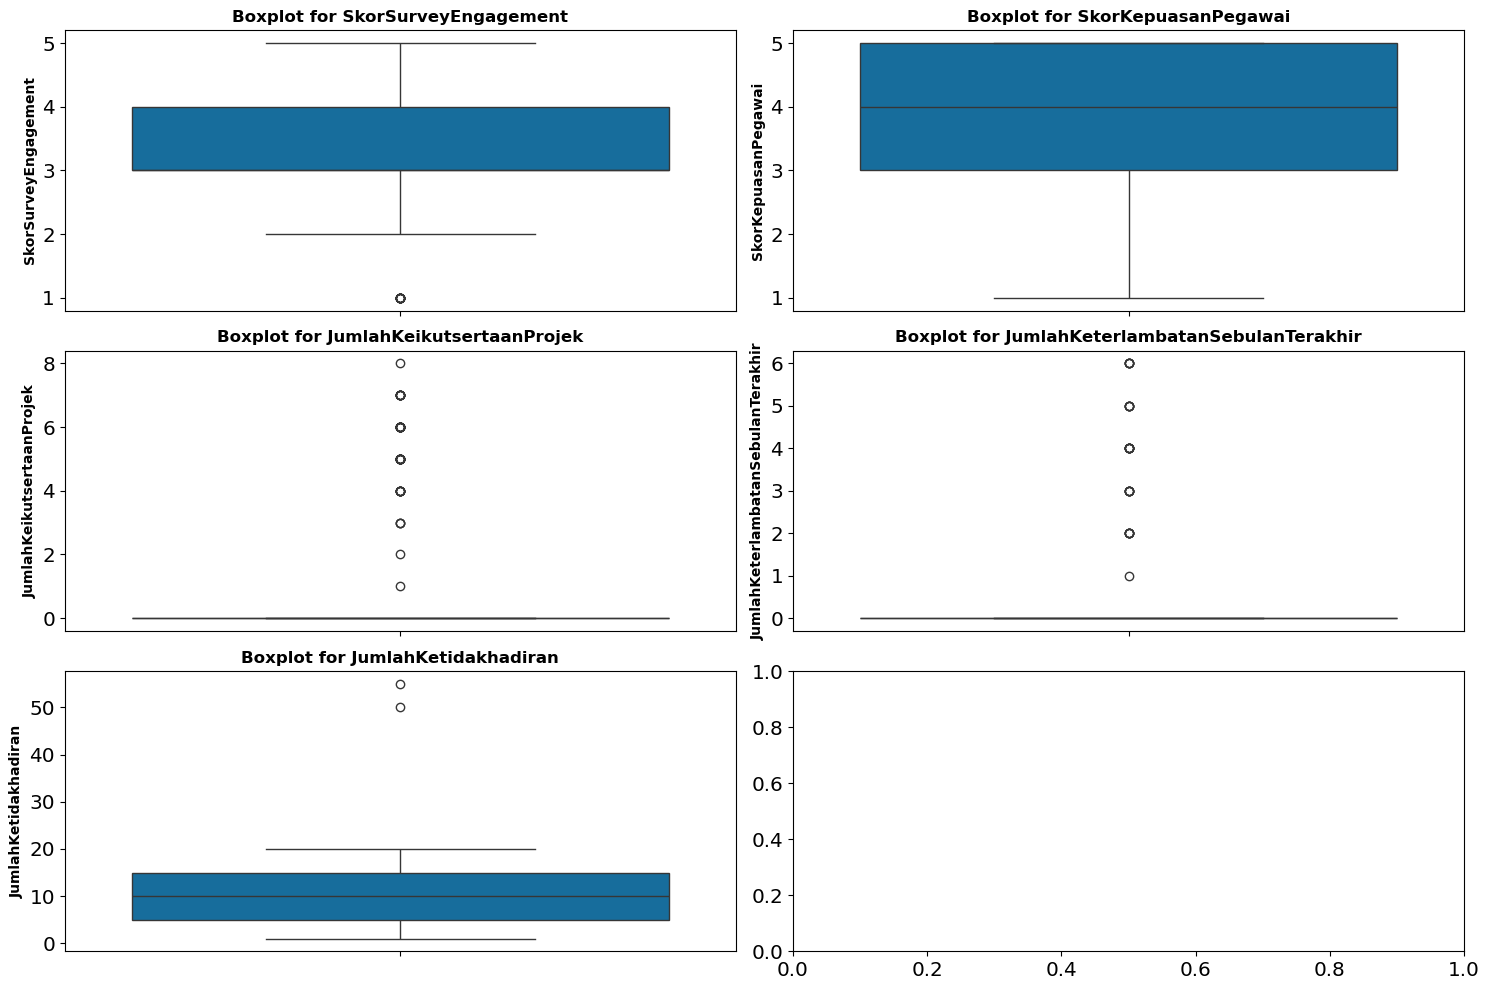

In [28]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numeric_columns):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for {column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(numeric_columns), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
# Check for duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# If there are duplicates, print the duplicate rows
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found")

# Remove duplicates and keep the first occurrence
df.drop_duplicates(inplace=True)

No duplicate rows found


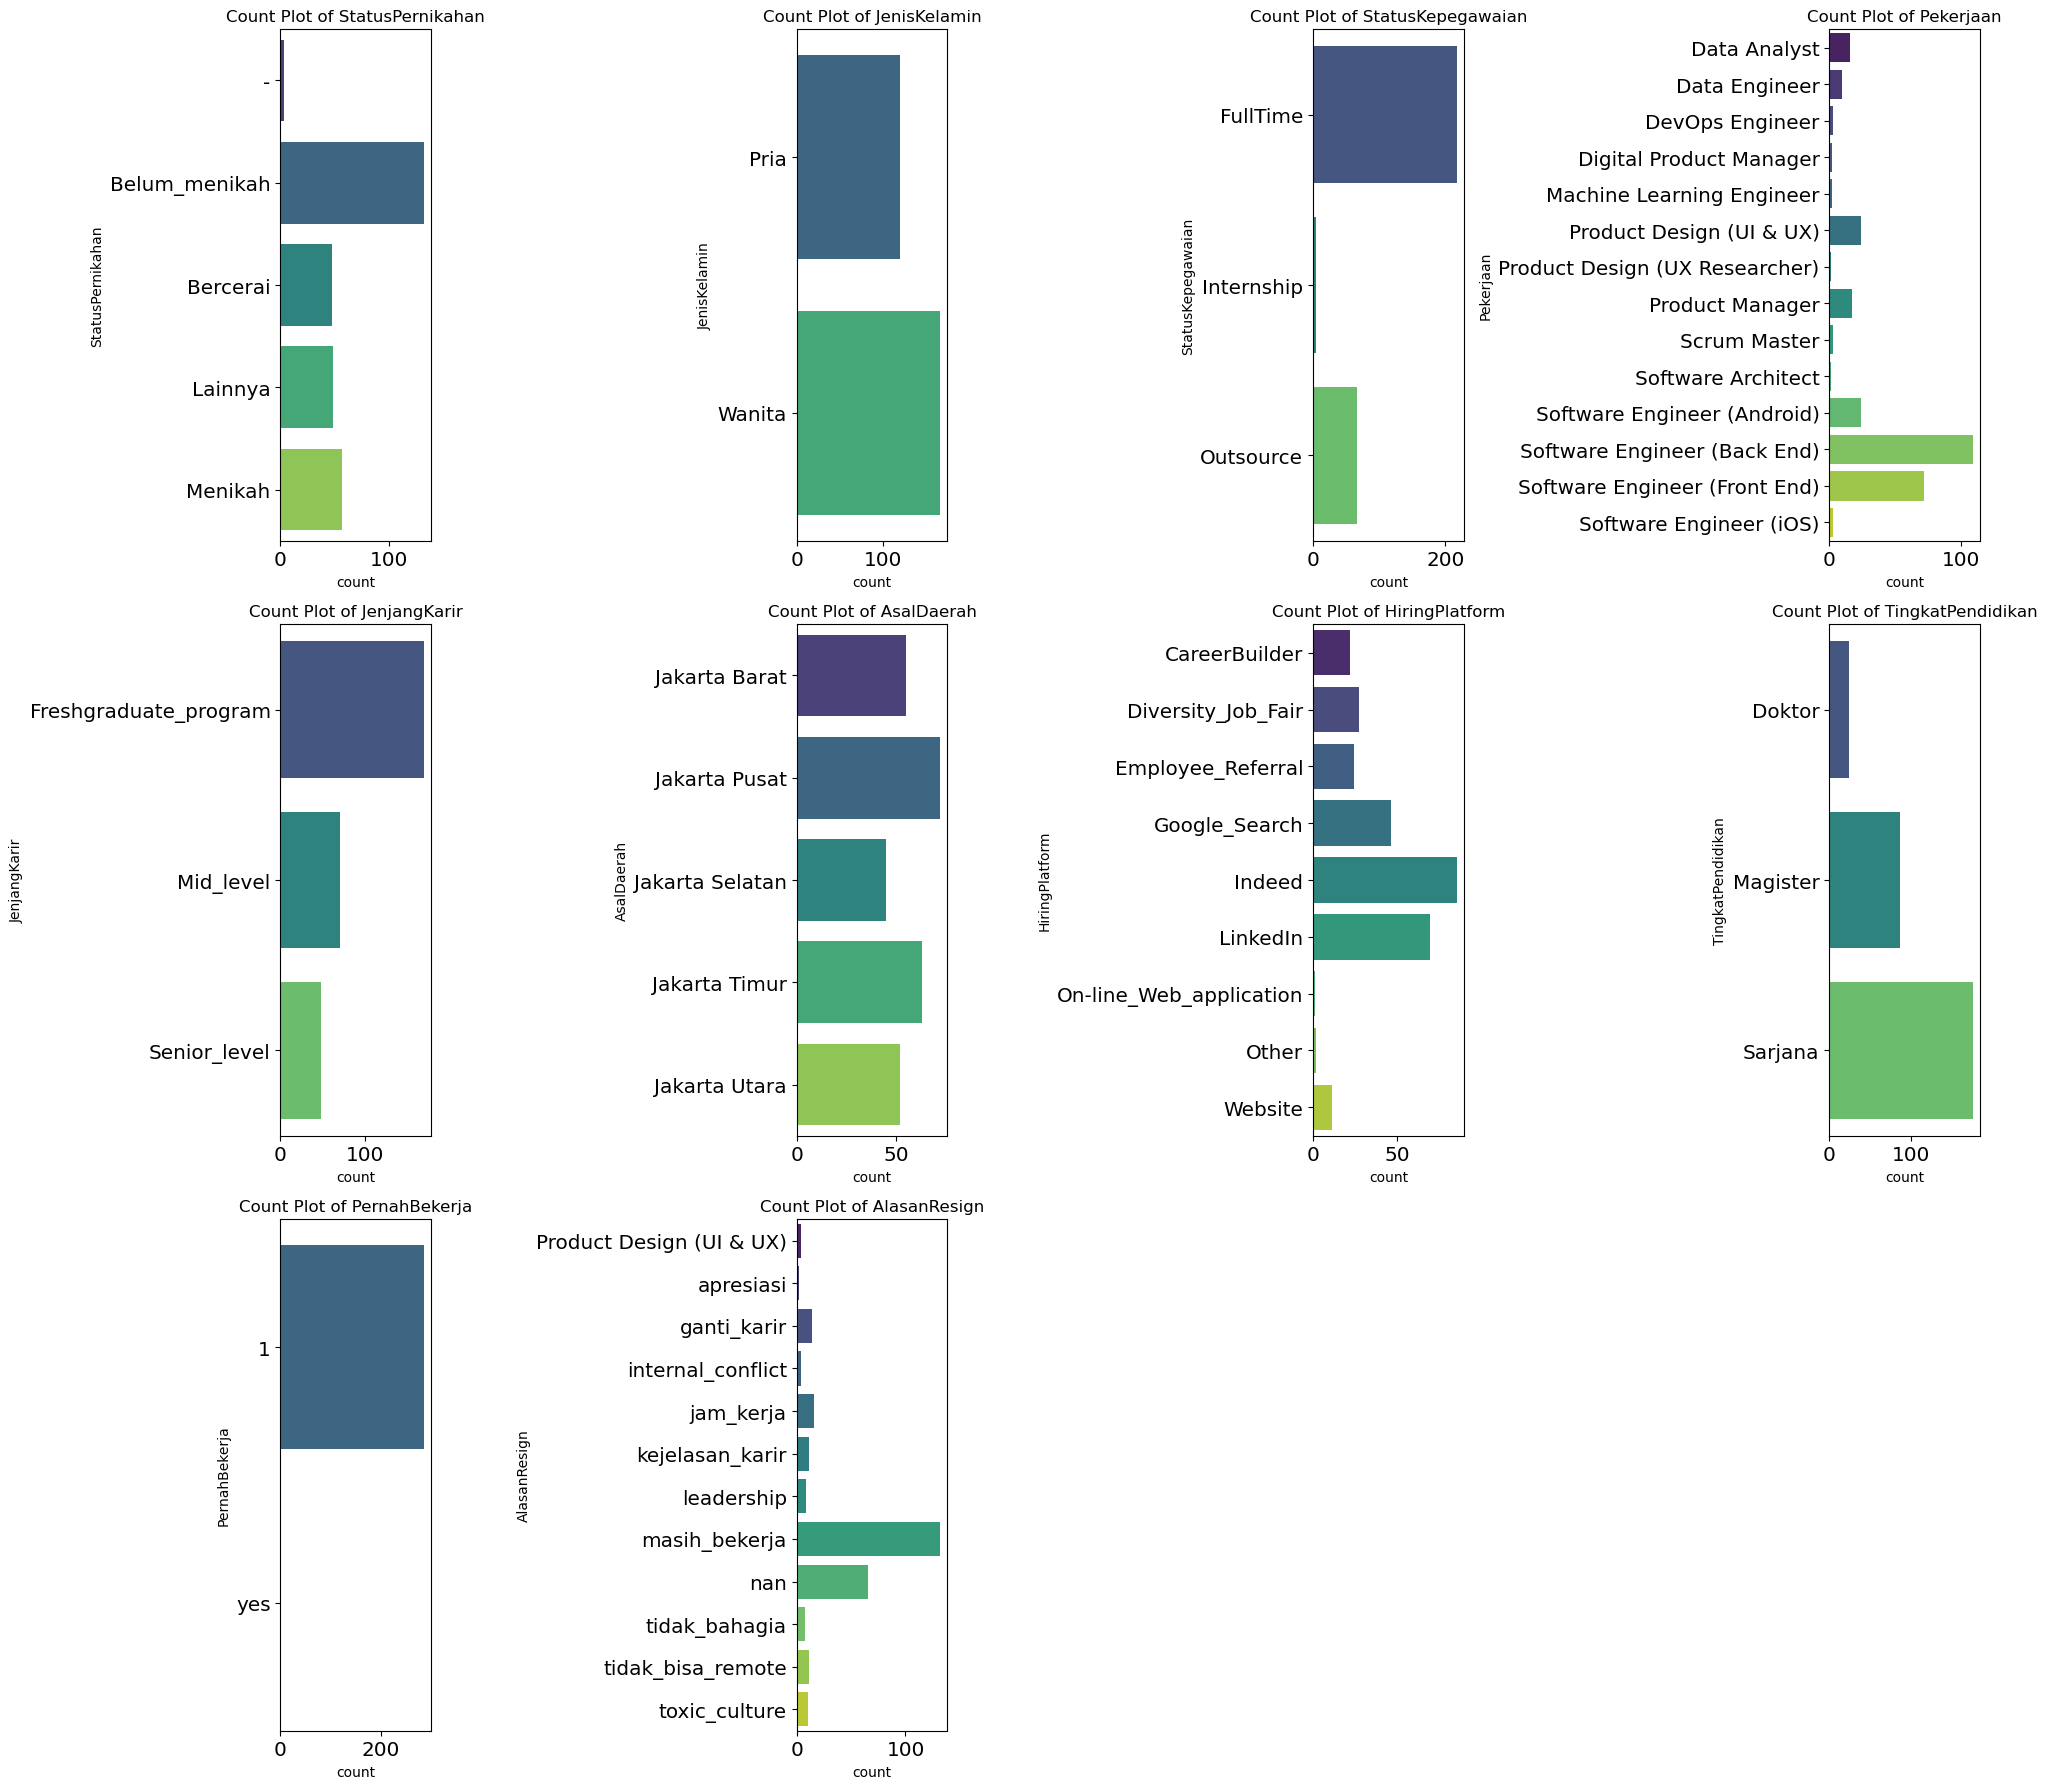

In [32]:
# Set the figure size
plt.figure(figsize=(20, 18))

# Create a 3x4 grid of subplots for count plots
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 4, i + 1)

    # Convert the column to a string type
    df[column] = df[column].astype(str)

    # Calculate the count of each category and sort them in ascending order
    category_counts = df[column].value_counts().sort_index(ascending=True)

    # Create the count plot
    sns.countplot(data=df, y=column, order=category_counts.index, palette='viridis')

    # Set labels and title
    plt.xlabel('count')
    plt.ylabel(column)
    plt.title(f'Count Plot of {column}')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

In [34]:
# Handling inconsistent data 'StatusPernikahan'
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Bercerai', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Lainnya', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Belum_menikah', 'Tidak_menikah')

# Handling inconsistent data 'PernahBekerja'
df['PernahBekerja'] = df['PernahBekerja'].replace('1', 'yes')

# Mengatasi inconsistent data pada kolom 'AlasanResign'
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', 'Dll')
df['AlasanResign'] = df['AlasanResign'].replace('nan', 'Dll')
     



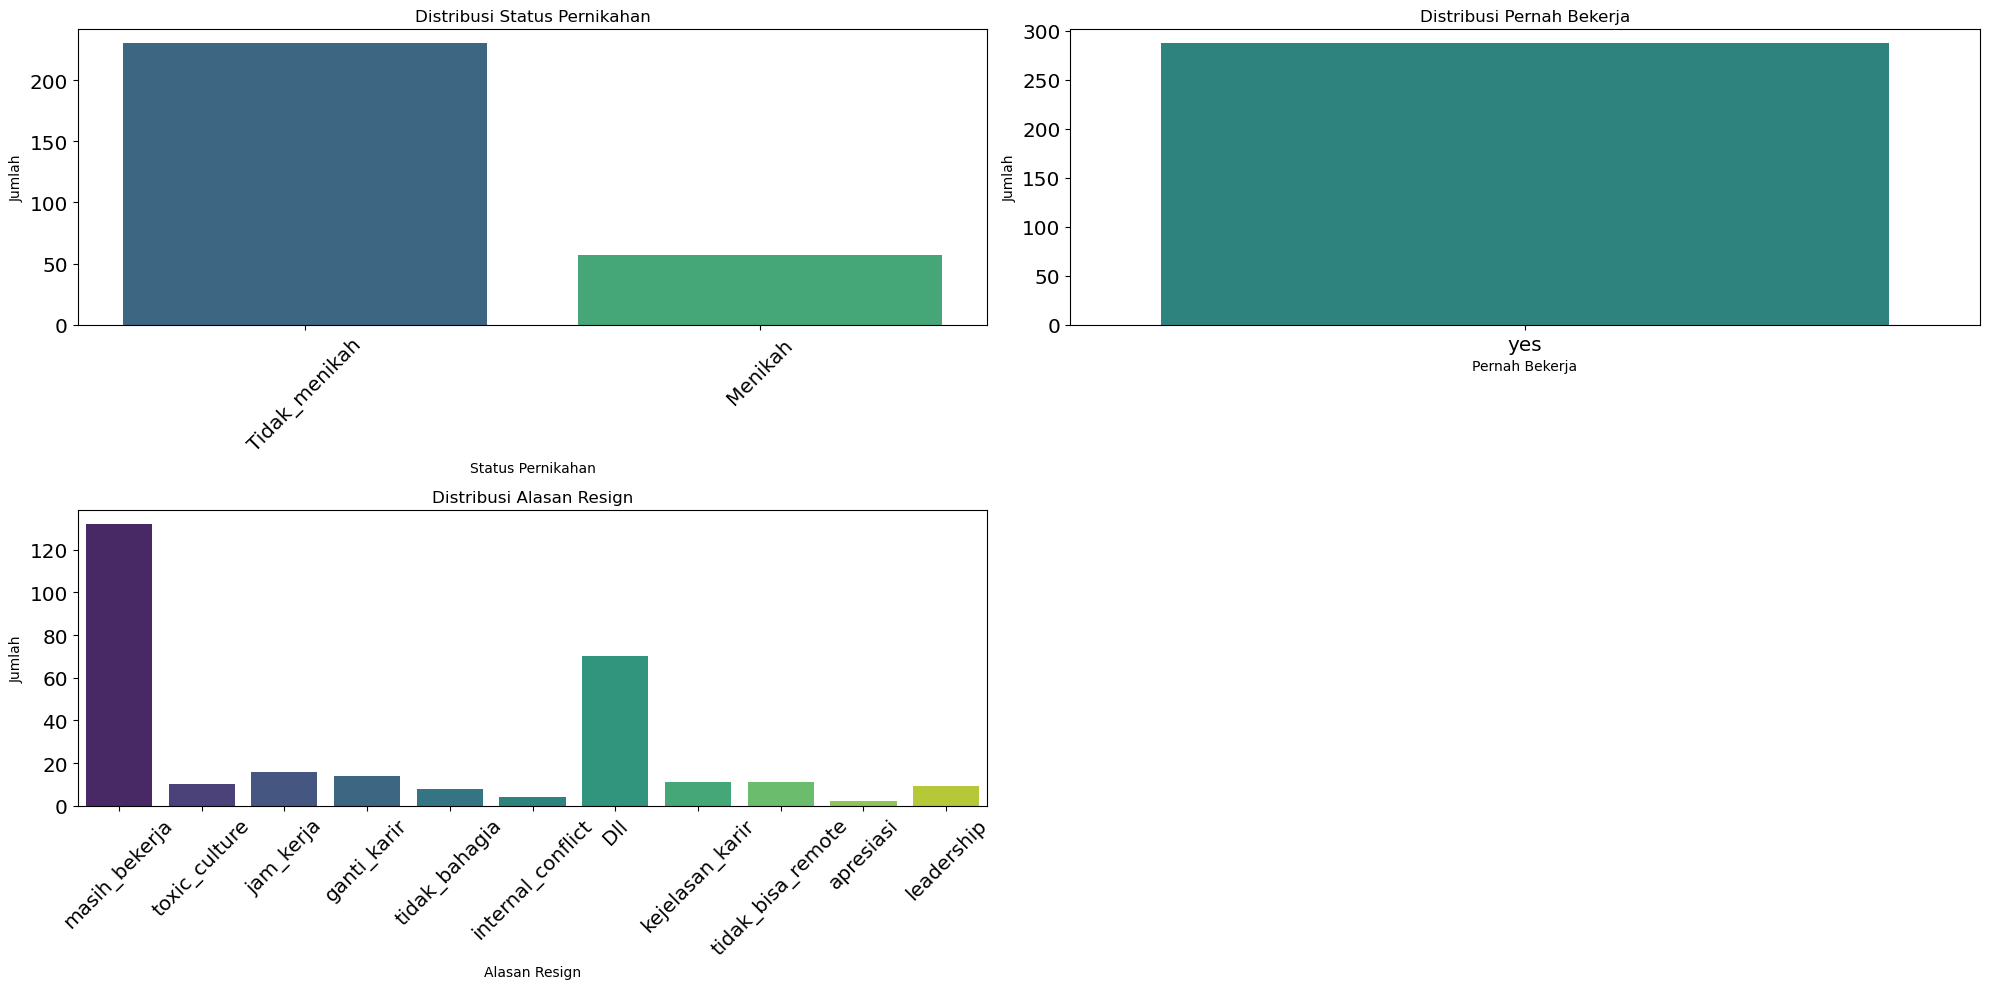

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Visualisasi kolom 'StatusPernikahan' setelah preprocessing
sns.countplot(data=df, x='StatusPernikahan', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Status Pernikahan')
ax[0, 0].set_xlabel('Status Pernikahan')
ax[0, 0].set_ylabel('Jumlah')
ax[0, 0].tick_params(axis='x', rotation=45)

# Visualisasi kolom 'PernahBekerja' setelah preprocessing
sns.countplot(data=df, x='PernahBekerja', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Distribusi Pernah Bekerja')
ax[0, 1].set_xlabel('Pernah Bekerja')
ax[0, 1].set_ylabel('Jumlah')

# Visualisasi kolom 'AlasanResign' setelah preprocessing
sns.countplot(data=df, x='AlasanResign', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Distribusi Alasan Resign')
ax[1, 0].set_xlabel('Alasan Resign')
ax[1, 0].set_ylabel('Jumlah')
ax[1, 0].tick_params(axis='x', rotation=45)

# Hide the last subplot (ax[1, 1]) since it's not used
ax[1, 1].axis('off')

# Set the display
plt.tight_layout()
plt.show()

In [36]:
# Membuat kolom baru "StatusKerja"
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if x == '-' or pd.isnull(x) else 'Tidak Bekerja')
     

In [38]:
df['StatusKerja'].head()

0    Masih Bekerja
1    Tidak Bekerja
2    Tidak Bekerja
3    Masih Bekerja
4    Tidak Bekerja
Name: StatusKerja, dtype: object

In [40]:


# Mengonversi kolom "TanggalHiring" menjadi tipe data datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

# Mengonversi kolom "TanggalResign" menjadi tipe data datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Mengekstrak tahun hiring dan tahun resign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['BulanHiring'] = df['TanggalHiring'].dt.month
df['HariHiring'] = df['TanggalHiring'].dt.day

df['TahunResign'] = df['TanggalResign'].dt.year

In [42]:

from datetime import datetime

df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
current_year = datetime.now().year
df['UsiaKaryawan'] = current_year - df['TanggalLahir'].dt.year

bins = [0, 30, 40, float('inf')]
labels = ['Muda', 'Menengah', 'Tua']
df['KategoriUsia'] = pd.cut(df['UsiaKaryawan'], bins=bins, labels=labels)

In [44]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['LamaMenjabat'] = ((df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days // 30).fillna(0)
     

In [46]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [48]:
# 1. Create two aggregate tables for incoming and outgoing employees
incoming_employees = df['TahunHiring'].value_counts().reset_index()
incoming_employees.columns = ['Year', 'Incoming Employees']

outgoing_employees = df['TahunResign'].value_counts().reset_index()
outgoing_employees.columns = ['Year', 'Outgoing Employees']

# 2. Join the two tables based on the year of resignation and hiring using an outer join
annual_report = incoming_employees.merge(outgoing_employees, on='Year', how='outer')

# 3. Perform imputation on the empty year data
annual_report['Year'] = annual_report['Year'].fillna(0)
annual_report['Year'] = annual_report['Year'].astype(int)

# 4. Calculate the total number of employees who resigned, those who still remain, and the changes in each year
annual_report['Total Resigned'] = annual_report['Outgoing Employees'].cumsum()
annual_report['Total Remaining'] = annual_report['Incoming Employees'].cumsum() - annual_report['Total Resigned']
annual_report['Changes'] = annual_report['Total Remaining'] - annual_report['Total Resigned']
     

In [50]:

annual_report = annual_report.sort_values(by='Year')

annual_report

Year  Incoming Employees  Outgoing Employees  Total Resigned  \
0   2006                 1.0                 NaN             NaN   
1   2007                 2.0                 NaN             NaN   
2   2008                 2.0                 NaN             NaN   
3   2009                 7.0                 NaN             NaN   
4   2010                 8.0                 NaN             NaN   
5   2011                76.0                 NaN             NaN   
6   2012                41.0                 NaN             NaN   
7   2013                43.0                 5.0             5.0   
8   2014                56.0                12.0            17.0   
9   2015                31.0                 8.0            25.0   
10  2016                14.0                 8.0            33.0   
11  2017                 5.0                19.0            52.0   
12  2018                 1.0                26.0            78.0   
13  2019                 NaN                 5.0            83.0   
14  2020                 NaN                 6.0            89.0   

    Total Remaining  Changes  
0               NaN      NaN  
1               NaN      NaN  
2               NaN      NaN  
3               NaN      NaN  
4               NaN      NaN  
5               NaN      NaN  
6               NaN      NaN  
7             175.0    170.0  
8             219.0    202.0  
9             242.0    217.0  
10            248.0    215.0  
11            234.0    182.0  
12            209.0    131.0  
13              NaN      NaN  
14              NaN      NaN

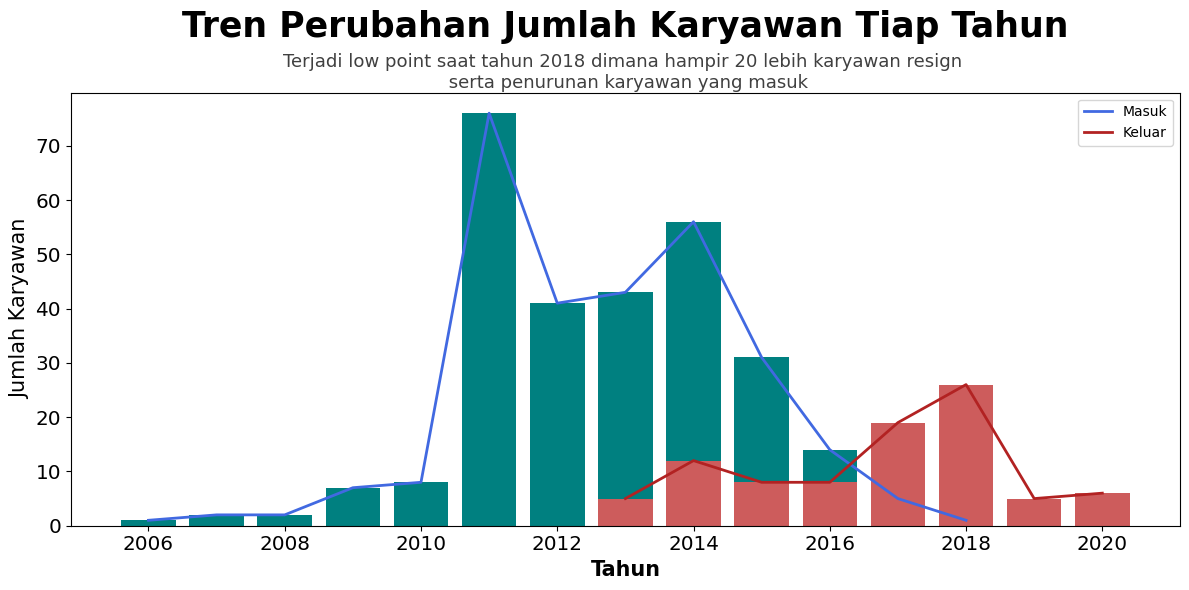

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line and bar plot for incoming employees
sns.lineplot(data=annual_report, x='Year', y='Incoming Employees', label='Masuk', lw=2, ax=ax, color= 'royalblue')
ax.bar(annual_report['Year'], annual_report['Incoming Employees'], color='teal')
# Line and Bar chart for outgoing employees
sns.lineplot(data=annual_report, x='Year', y='Outgoing Employees',color='firebrick', label='Keluar', lw=2, ax=ax)
ax.bar(annual_report['Year'], annual_report['Outgoing Employees'], color='indianred')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Terjadi low point saat tahun 2018 dimana hampir 20 lebih karyawan resign \n serta penurunan karyawan yang masuk'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=13, alpha=0.75)

# Set labels and title
ax.set_xlabel('Tahun', fontsize=15, fontweight='bold')
ax.set_ylabel('Jumlah Karyawan', fontsize=15)
ax.set_title('Tren Perubahan Jumlah Karyawan Tiap Tahun', fontsize=25, fontweight='bold', pad=40)

# Add legends for both line and bar chart
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

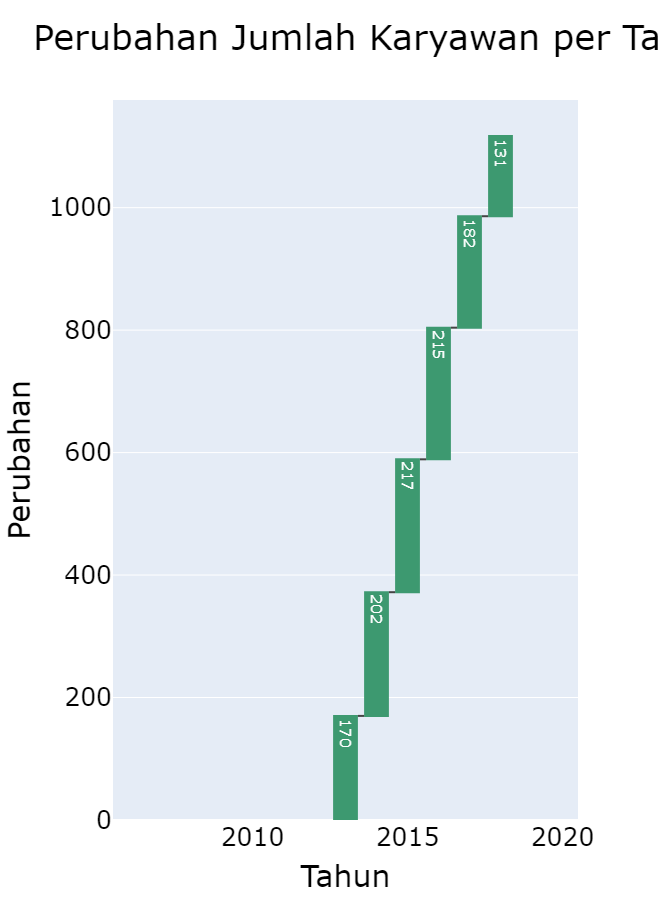

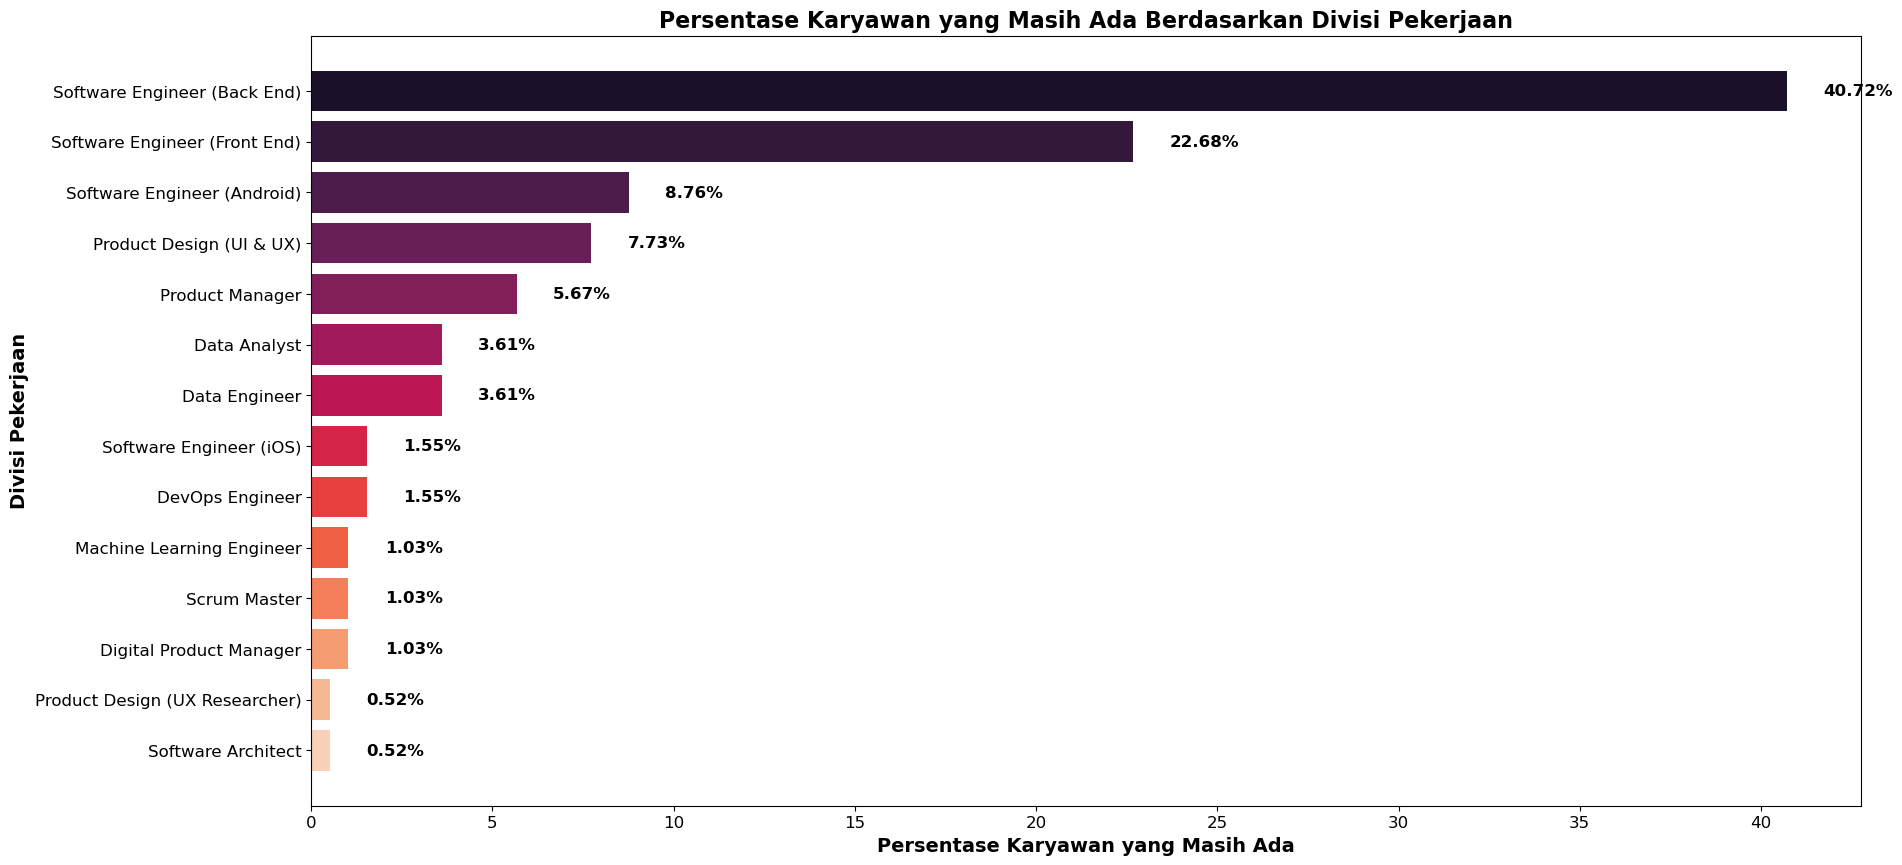

In [54]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Waterfall(
        x=annual_report['Year'],
        y=annual_report['Changes'],
        text=annual_report['Changes'].apply(lambda x: f'{x:,.0f}'),
        measure=['relative'] * len(annual_report),
        base=0
    )
])

fig.update_layout(
    title="Perubahan Jumlah Karyawan per Tahun",
    xaxis_title="Tahun",
    yaxis_title="Perubahan",
    font=dict(
        size=25,
        color='black'
    ),
    width=1300,
    height=900
)

fig.show()
     
divisions = [
    'Product Design (UX Researcher)',
    'Software Architect',
    'Machine Learning Engineer',
    'Scrum Master',
    'Digital Product Manager',
    'Software Engineer (iOS)',
    'DevOps Engineer',
    'Data Analyst',
    'Data Engineer',
    'Product Manager',
    'Product Design (UI & UX)',
    'Software Engineer (Android)',
    'Software Engineer (Front End)',
    'Software Engineer (Back End)'
]
counts = [
    1, 1, 2, 2, 2, 3, 3, 7, 7, 11, 15, 17, 44, 79
]

total_karyawan = sum(counts)
percentages = [(count / total_karyawan) * 100 for count in counts]

# Sort divisions and percentages in ascending order by values
sorted_data = sorted(zip(divisions, percentages), key=lambda x: x[1], reverse=True)

divisions, percentages = zip(*sorted_data)

# Customize the color palette
colors = sns.color_palette('rocket', len(divisions))

# Create the horizontal bar chart
plt.barh(divisions, percentages, color=colors)
plt.xlabel('Persentase Karyawan yang Masih Ada', fontsize=14, fontweight='bold')
plt.ylabel('Divisi Pekerjaan', fontsize=14, fontweight='bold')
plt.title('Persentase Karyawan yang Masih Ada Berdasarkan Divisi Pekerjaan', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order of divisions

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.show()

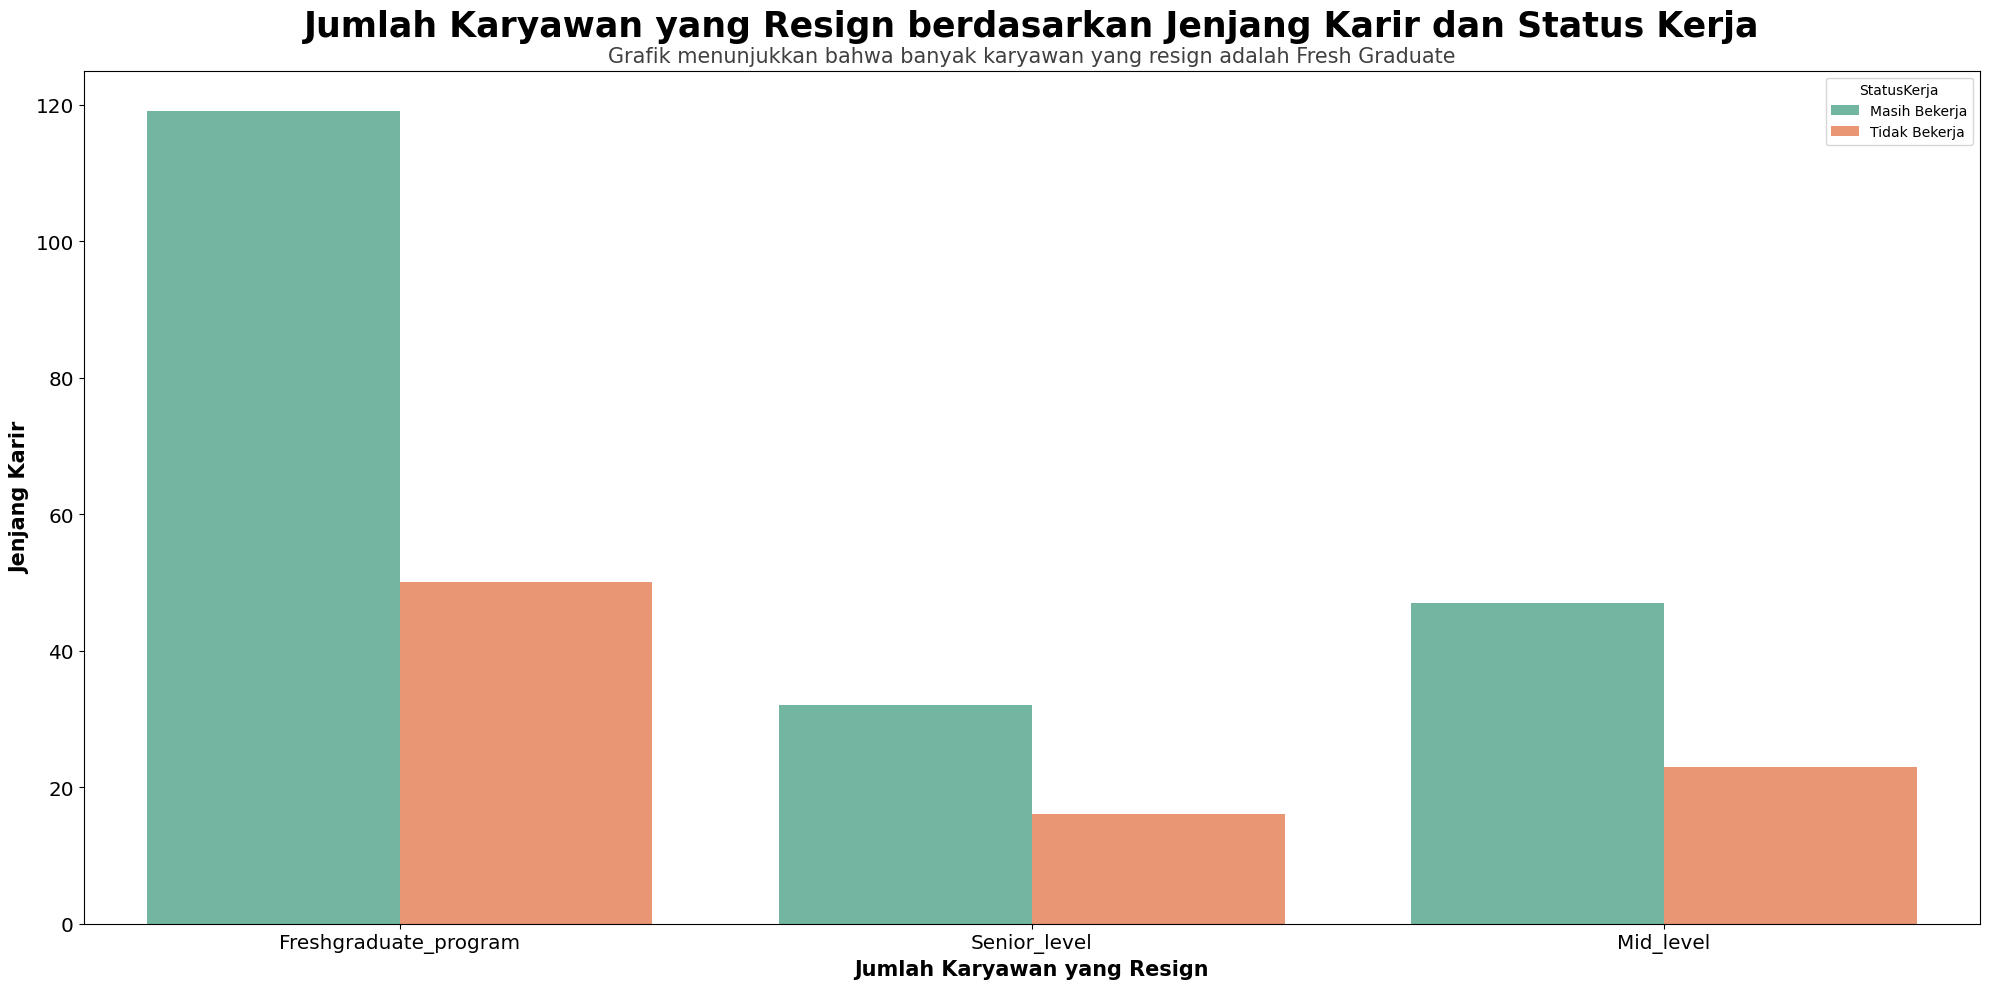

In [71]:

# Retrieve data on employees who have resigned
df_resigned = df[df['StatusKerja'] == 'Tidak Bekerja']

# Create an aggregation table to calculate the number of employees who resigned based on career level, employee performance and reasons for resigning
tabel_agregasi = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahKaryawanResign')
     

# Create a bar plot with "JenjangKarir" on the y-axis and "StatusKerja" as hue
sns.countplot(data=df, x='JenjangKarir', hue='StatusKerja', palette='Set2')

# Set the title and labels
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Grafik menunjukkan bahwa banyak karyawan yang resign adalah Fresh Graduate'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Jumlah Karyawan yang Resign', fontsize=15, fontweight='bold')
plt.ylabel('Jenjang Karir', fontsize=15, fontweight='bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Jenjang Karir dan Status Kerja', fontsize=25, fontweight='bold', pad=25)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

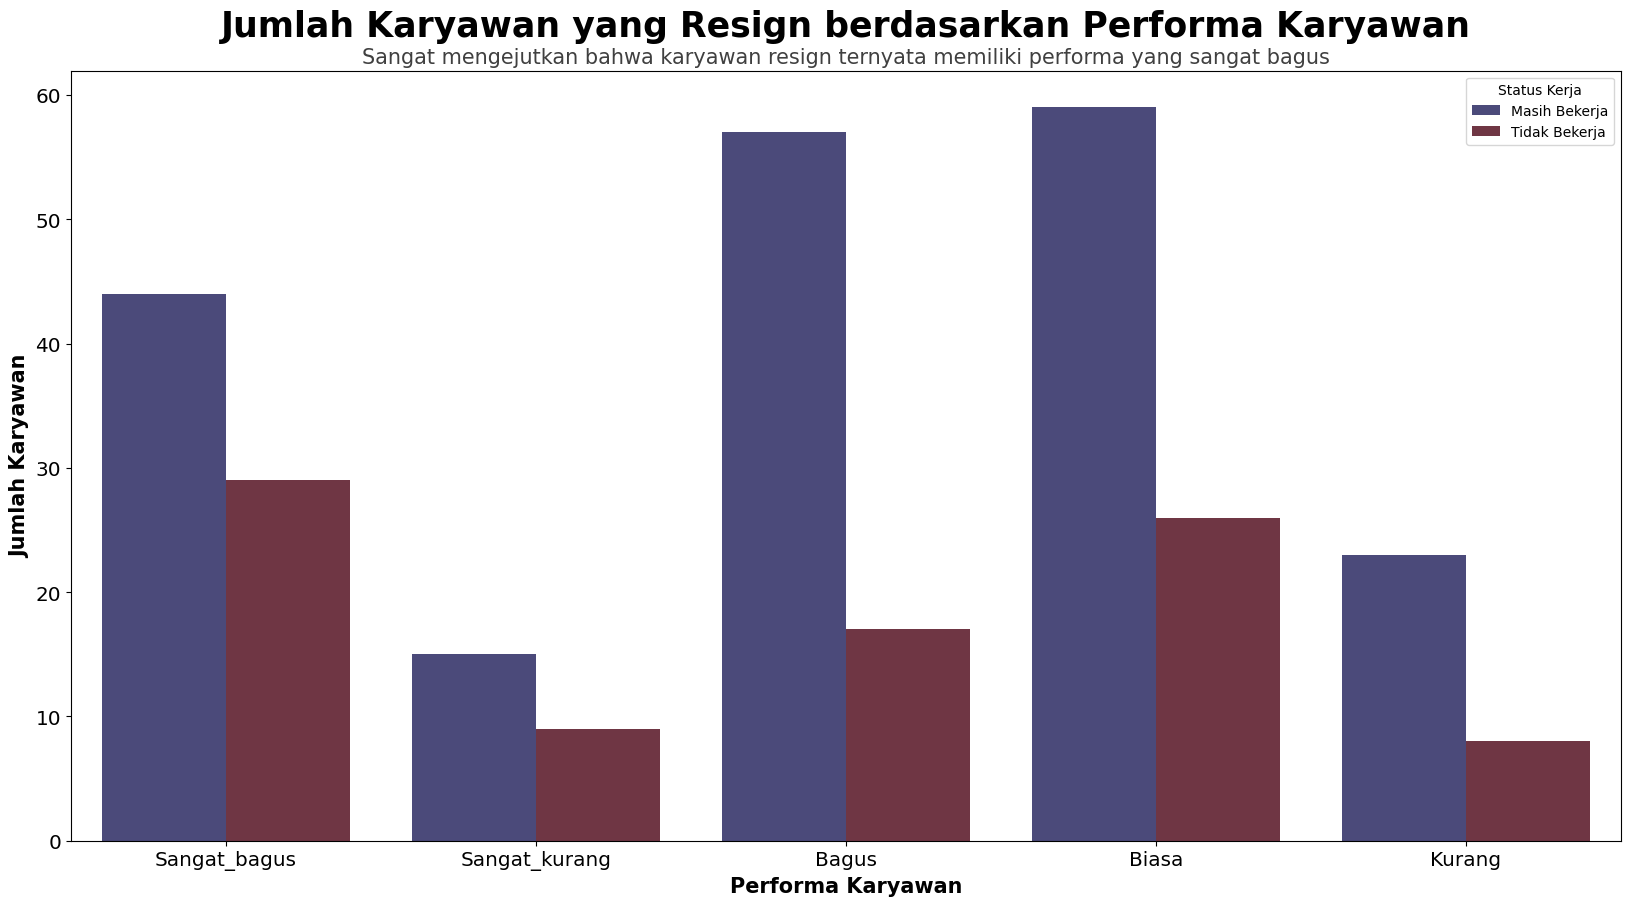

In [73]:

# Create the bar chart with hue based on "StatusKerja"
sns.countplot(data=df, x='PerformancePegawai', hue='StatusKerja', palette='icefire')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Sangat mengejutkan bahwa karyawan resign ternyata memiliki performa yang sangat bagus'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Performa Karyawan', fontsize=15, fontweight='bold')
plt.ylabel('Jumlah Karyawan', fontsize=15, fontweight='bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Performa Karyawan', fontsize=25, fontweight='bold', pad=25)

plt.xticks(rotation=0)
plt.legend(title='Status Kerja')
plt.show()

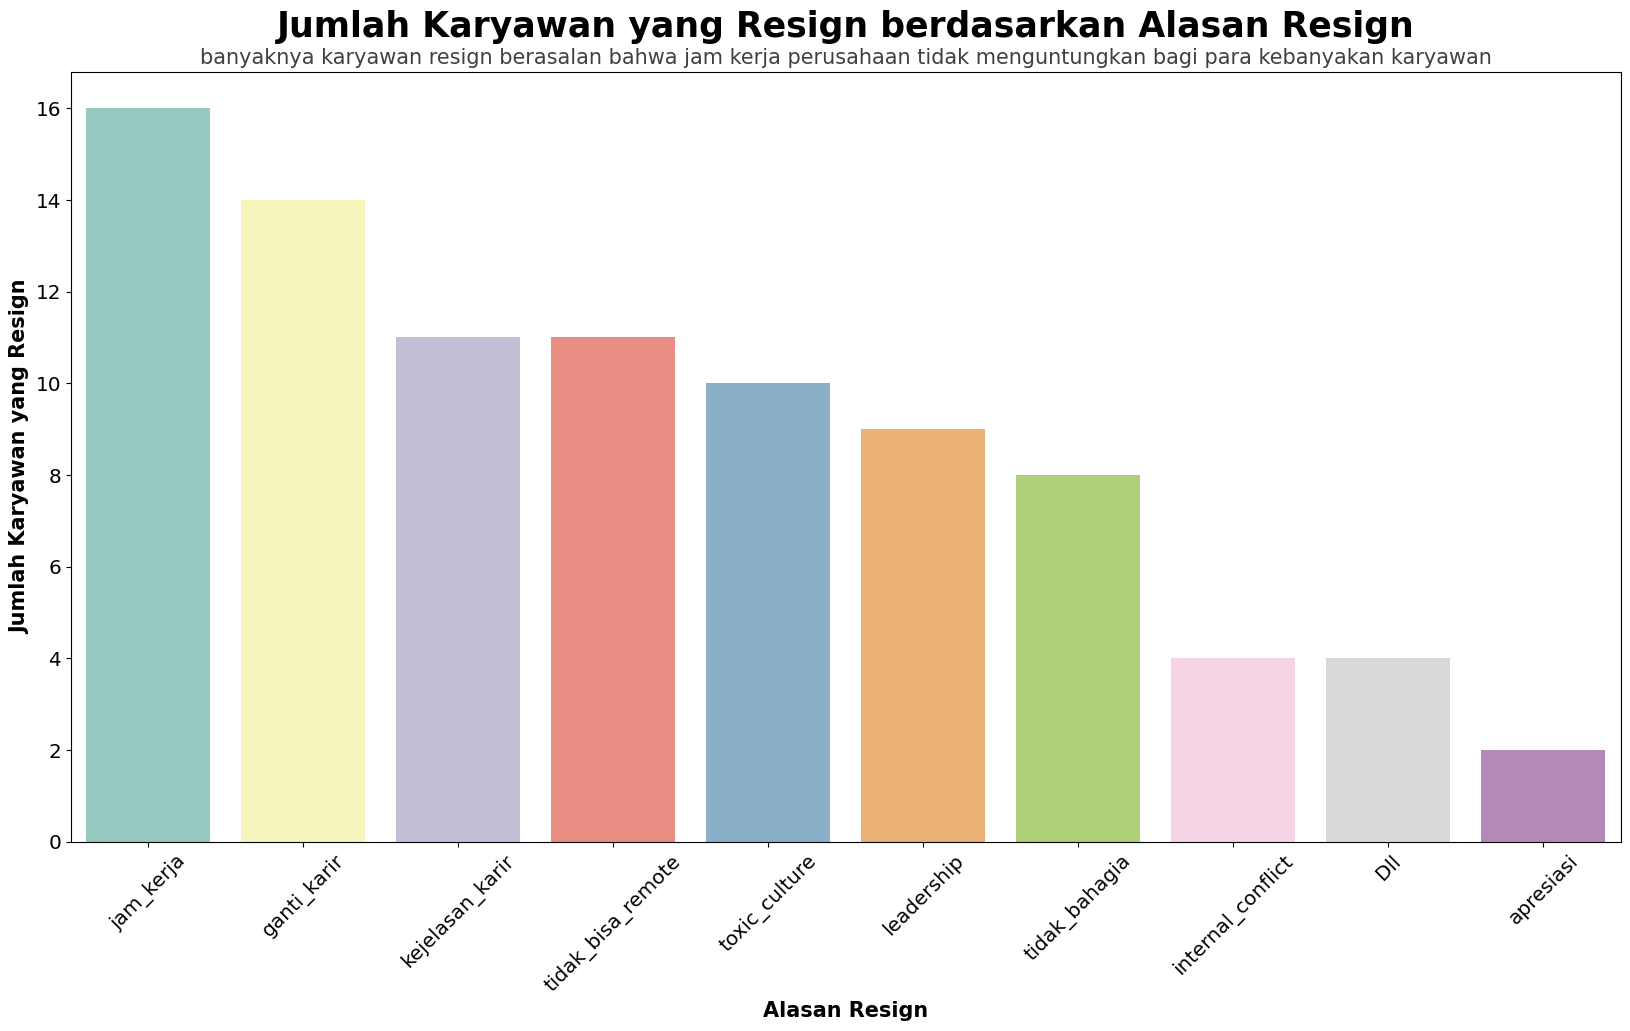

In [75]:
# Menghitung jumlah karyawan yang resign berdasarkan Alasan Resign
alasan_resign_counts = df_resigned['AlasanResign'].value_counts()

# Mengurutkan kategori Alasan Resign berdasarkan jumlah karyawan yang resign dari yang terbesar
alasan_resign_sorted = alasan_resign_counts.sort_values(ascending=False)
sns.countplot(x='AlasanResign', data=df_resigned, order=alasan_resign_sorted.index, palette='Set3')

#setting the title plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'banyaknya karyawan resign berasalan bahwa jam kerja perusahaan tidak menguntungkan bagi para kebanyakan karyawan'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Alasan Resign', fontsize = 15, fontweight = 'bold')
plt.ylabel('Jumlah Karyawan yang Resign', fontsize = 15, fontweight = 'bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Alasan Resign', fontsize = 25, fontweight = 'bold', pad = 25)
plt.xticks(rotation=45)
plt.show()